# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Muhammad Arya Revansyah
- **Email:** arya.revansyah@gmail.com
- **ID Dicoding:** aryarevansyah

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca pada peminjaman sepeda?
- Bagaimana jumlah peminjaman setiap bulannya?

In [124]:
!pip install streamlit

## Import Semua Packages/Library yang Digunakan

In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st
import calendar

## Data Wrangling

### Gathering Data

Gathering data atau pengumpulan data merupakan proses untuk mengumpulkan semua data yang dibutuhkan untuk menjawab semua pertanyaan atau masalah bisnis.

Data yang diperoleh berasal dari Kaggle yang merupakan platform untuk mencari dataset. Dataset yang diperoleh berupa "Bike Sharing Dataset" sebagai "predicting bike sharing demand" yang diunggah oleh Lakshimpathi N. asal India.

Terdapat dua file yang diberikan, yaitu day.csv dan hour.csv. Pada kedua file tersebut memberikan informasi mengenai sistem bike sharing, dengan data hour.csv dilengkapi dengan data hour atau jam. Dengan pertanyaan bisnis, maka dapat digunakan dataset day.csv sebagai analisis data ini.

Data day.csv tersebut diunduh dan disimpan di Github repository sehingga mudah untuk diakses. Kemudian diperoleh url dari raw data day.csv yang akan di baca menggunakan fungsi pd.read_csv() sehingga data akan dapat berbentuk DataFrame. Serta, untuk melihat review data yang telah di baca menggunakan fungsi tersebut dapat menggunakan head() untuk melihat 5 baris data awal dan tail() untuk melihat 5 baris data akhir dari dataset yang diperoleh.

In [153]:
data = "https://raw.githubusercontent.com/aryarevansyah23/Proyek-Analisis-Data/main/Data/day.csv"

day_df = pd.read_csv(data)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [154]:
day_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


### Assessing Data

Assessing data merupakan proses untuk menilai kualitas dan struktur dari sebuah data. Serta, untuk mengidentifikasi berbagai masalah yang terdapat dalam data.

Salah satu permasalahan dari data yang diperoleh umumnya adalah missing value. Untuk mengidentifikasi hal tersebut dapat menggunakan info() untuk melihat beberapa informasi mengenai data yang digunakan dari day.csv.

In [155]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [156]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dapat terlihat beberapa informasi seperti ukuran kolom data, jenis data, dan jumlah kondisi data yang tersedia. Dapat dilakukan pengidentifikasian kembali menggunakan.isnull().sum() untuk melihat berapa jumlah missing value yang ada pada data yang digunakan. Dapat terlihat bahwa data tersebut bersih dan tidak ada missing value dari data yang digunakan.

Kemudian, dapat diperhatikan data yang digunakan terdapat data yang terduplikasi. Pengidentifikasian dapat menggunakan duplicated() untuk melihat duplikasi pada data.

In [130]:
day_df.duplicated().sum()

0

Dapat terlihat data yang diberikan dari duplikasi data adalah nol atau tidak ada.

Selain melakukan pengecekan pada missing value dan duplicate data. Dapat dilakukan pengecekan pada parameter statistik dengan menggunakan describe() dengan menampilkan ringkasan dari parameter statistik.

Serta, dapat melakukan pengecekan pada outlier data menggunakan boxplot() pada library seaborn sehingga dapat membantu secara visual untuk mendeteksi keberadaan outlier pada data yang digunakan.

In [131]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Text(0.5, 1.0, 'Boxplot data day.csv')

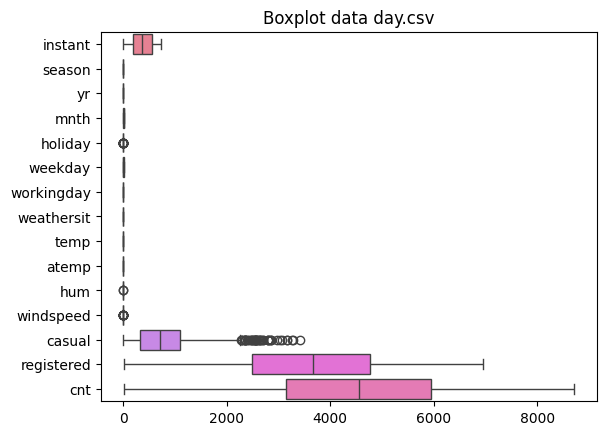

In [132]:
sns.boxplot(day_df, orient='h')
plt.title('Boxplot data day.csv')

Pada data yang ditampilkan data cenderung tidak memiliki masalah pada parameter statistik.

Pada visual data boxplot() dapat terlihat bahwa data yang digunakan umumnya tidak terdapat outlier kecuali pada data casual. Terlihat bahwa data casual mengalami outlier pada data diatas 2000.

Dari proses Assesing data berikut dapat diketahui bahwa tidak terdapat missing value ataupun duplicate data. Serta, pada parameter statistik dan boxplot() cenderung tidak mengalami masalah. Kecuali, pada data casual yang memiliki outlier, tetapi dari data tersebut tidak perlu untuk dibersihkan karena dikhawatirkan terdapat informasi penting untuk dieksplor lebih jauh. Terdapat data yang perlu untuk dibersihkan atau diperbaiki, yaitu data dari kolom dteday karena jenis data pada kolom tersebut adalah object sedangkan dari informasi, kolom tersebut merupakan jenis data datetime.

### Cleaning Data

Cleaning data merupakan proses untuk membersihkan data yang kotor sehingga tidak memengaruhi hasil analisis nantinya.

Sebelumnya pada proses assessing data, telah diketahui dua permasalah, yaitu outlier dari data casual dan jenis data dari dteday. Pada data casual dapat dibiarkan terlebih dahulu, khawatir terdapat informasi penting didalamnya. Sedangkan, data dteday dapat melakukan perubahan jenis data untuk menempatkan jenis data yang tepat untuk data dteday.

Perubahan jenis data dapat dilakukan dengan menempatkan dataframe day_df dengan memberikan spesifik kolom yang akan diubah 'dteday'. Kemudian, menggunakan fungsi to_datetime() untuk mengubah jenis data menjadi datetime dengan memberikan parameter berupa kolom yang ingin diubah jenis datanya.

In [157]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [158]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Pada data yang telah diubah, maka dapat dilakukan pengecekan menggunakan fungsi info() sehingga dapat terlihat bahwa pada kolom dteday jenis data telah berupa datetime.

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) merupakan tahapan eksplorasi data yang telah dibersihkan sebelumnya untuk memeroleh insight dan menjawab pertanyaan analisis.

Melihat pertanyaan analisis sebelumnya, yaitu:
- Bagaimana pengaruh cuaca pada peminjaman sepeda?
- Bagaimana jumlah peminjaman setiap bulannya dan minggunya?

### Explore day_df

Eksplorasi data dapat dilakukan dengan melihat rangkuman parameter statistik secara keseluruhan. Proses tersebut dapat dengan menggunakan fungsi berupa describe(include='all').

In [135]:
day_df.describe(include='all')

<ipython-input-135-a3f85d0fb009>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include='all')


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Pada data yang telah diberikan fungsi describe(include='all') dapat terlihat beberapa informasi yang dapat diperoleh dari keseluruhan data day_df.

Untuk menjawab pertanyaan bisnis yang telah ditentukan, maka perlu untuk melakukan operasi agregasi dengan fungsi groupby() dan agg().

Pada musim (*season*)

In [159]:
day_df.groupby(by='season').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
})

,casual,registered,cnt
season,,,
1,60622,410726,471348
2,203522,715067,918589
3,226091,835038,1061129
4,129782,711831,841613


Pada bulan (*mnth*)

In [160]:
day_df.groupby(by='mnth').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
})

,casual,registered,cnt
mnth,,,
1,12042,122891,134933
2,14963,136389,151352
3,44444,184476,228920
4,60802,208292,269094
5,75285,256401,331686
6,73906,272436,346342
7,78157,266791,344948
8,72039,279155,351194
9,70323,275668,345991


Pada hari libur (*holiday*)

In [161]:
day_df.groupby(by='holiday').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
})

,casual,registered,cnt
holiday,,,
0,597658,2616586,3214244
1,22359,56076,78435


Pada *Weekday*

In [139]:
day_df.groupby(by='weekday').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
})

,casual,registered,cnt
weekday,,,
0,140521,303506,444027
1,70784,384719,455503
2,57843,411266,469109
3,57319,415729,473048
4,61460,423935,485395
5,78238,409552,487790
6,153852,323955,477807


Pada *Workingday*

In [140]:
day_df.groupby(by='workingday').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
})

,casual,registered,cnt
workingday,,,
0,316732,683537,1000269
1,303285,1989125,2292410


Pada *Weathersit*

In [141]:
day_df.groupby(by='weathersit').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
})

,casual,registered,cnt
weathersit,,,
1,446346,1811606,2257952
2,169776,827082,996858
3,3895,33974,37869


Pada data yang ditampilkan secara grouping, maka dapat terlihat beberapa pertanyaan bisnis yang ditanyakan sebelumnya dapat terjawab dengan melihat data-data tersebut. Seperti pada data "weekday", terlihat bahwa para pengguna casual di hari libur 6 (saturday) dan 0 (sunday) memiliki peningkatan dibandingkan hari yang lain. Begitu pula pada pengguna registered mengalami penurunan pada hari libu 6 dan 0.

Selain itu, pada data bulan dapat terlihat bahwa pada bulan 12, 1, dan 2, baik pengguna casual dan registered mengalami penurunan pengguna.

Data-data tersebut akan lebih mudah bila ditampilkan secara visual. Dengan begitu, untuk membantu menjawab pertanyaan bisnis, maka dapat menggunakan visualization dalam menjelaskan analisis kita dari data yang kita peroleh.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana pengaruh cuaca pada peminjaman sepeda?

Pada pertanyaan ini kita dapat melihat pada kondisi temperatur, humidity, dan windspeed pada setiap bulannya.

Perlu dibuat grouping dari data waktu (dteday) dan diubah pada kondisi waktu bulan dengan fungsi to_period('M') dan melihat pada jumlah data temp, hum, windspeed. Dalam mempermudah proses plotting, maka diperlukan penggunaan fungsi to_timestamp() pada data mont_bike['dteday']. Setelah itu, data dapat di ploting dengan plt.plot() menggunakan parameter berupa data sumbu x, sumbu y, dan label untuk pemanbahan legend atau keterangan nantinya. Serta, menambahkan judul dan legend untuk membantu menjelaskan grafik. Selain itu, diperlukan plt.xticks() karena keterangan pada sumbu x yang terlalu padat sehingga perlu untuk diubah posisinya untuk dapat lebih jelas.



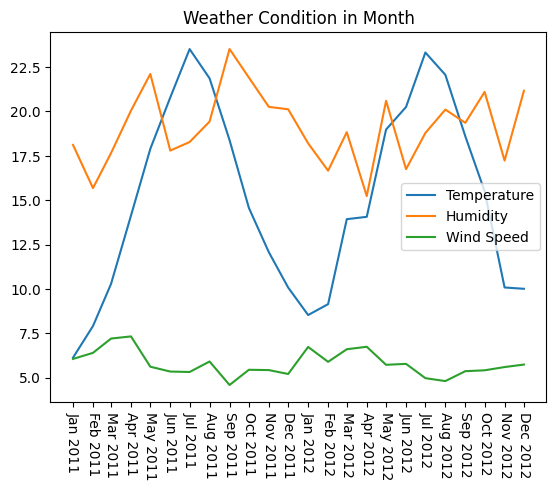

In [162]:
month_bike = day_df.groupby(day_df['dteday'].dt.to_period('M')).agg({
    'temp' : 'sum',
    'hum' : 'sum',
    'windspeed' : 'sum'
}).reset_index()

month_bike['dteday'] = month_bike['dteday'].dt.to_timestamp()

plt.plot(month_bike['dteday'], month_bike['temp'], label = 'Temperature')
plt.plot(month_bike['dteday'], month_bike['hum'], label = 'Humidity')
plt.plot(month_bike['dteday'], month_bike['windspeed'], label = 'Wind Speed')

plt.title("Weather Condition in Month")
plt.xticks(month_bike['dteday'], labels = month_bike['dteday'].dt.strftime('%b %Y'), rotation = -90)
plt.legend()
plt.show()

dapat terlihat pada data weather condition in month bahwa pada bulan desember hingga februari menunjukkan waktu yang tidak baik untuk menggunakan sepeda karena pada kondisi tersebut temperatur berada pada kondisi rendah sehingga lingkungan terasa cukup dingin, pada wind speed berada pada kondisi yang cukup tinggi sehingga cukup mengganggu untuk mengendarai sepeda selain itu kondisi tersebut membuat pengguna cukup sulit untuk menggunakan sepeda, serta pada humidity berada pada kondisi yang yang cukup rendah dan kondisi tersebut tidak cukup baik untuk seseorang menggunakan sepeda karena akan cukup mengganggu kenyamanan pengguna.

Hal tersebut telah memperlihatkan kondisi tersebut akan cukup memengaruhi pengguna sepeda pada rentang bulan desember hingga febreuari

Oleh karena itu, kita perlu melihat data dari pengguna sepeda terhadap waktu bulan. Dengan begitu, kita dapat melihat data pengguna casual, registered, dan total perbulan.


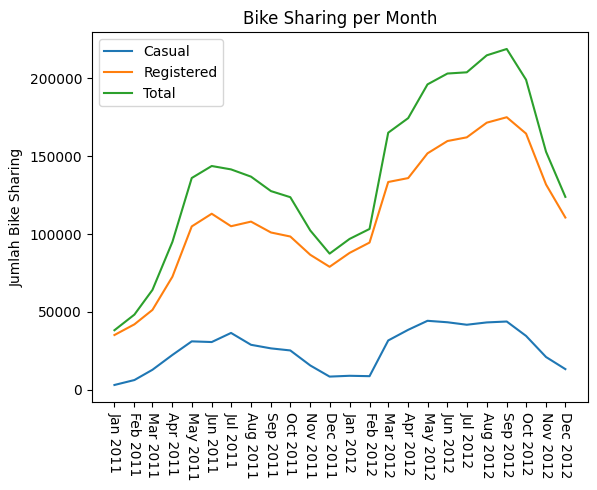

In [172]:
month_bike = day_df.groupby(day_df['dteday'].dt.to_period('M')).agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
}).reset_index()

month_bike['dteday'] = month_bike['dteday'].dt.to_timestamp()

plt.plot(month_bike['dteday'], month_bike['casual'], label = 'Casual')
plt.plot(month_bike['dteday'], month_bike['registered'], label = 'Registered')
plt.plot(month_bike['dteday'], month_bike['cnt'], label = 'Total')

plt.title("Bike Sharing per Month")
plt.xticks(month_bike['dteday'], labels = month_bike['dteday'].dt.strftime('%b %Y'), rotation = -90)
plt.ylabel('Jumlah Bike Sharing')
plt.legend()
plt.show()

Pada grafik bike sharing per month, dapat terlihat bahwa pengguna sepeda mengalami penurunan pada bulan desember hingga februari. Hal tersebut tentunya sesuai dari data weather condition in month bahwa pada kondisi cuaca tersebut pengguna sepeda akan mengalami penurunan.

### Pertanyaan 2:

Bagaimana jumlah peminjaman setiap minggunya?

Pada pertanyaan berikut dapat terlihat bahwa kita ingin melihat jumlah pengguna sepeda setiap minggunya sehingga kita perlu untuk melihat data pengguna casual, registered, dan total dengan melihat pada data weekday karena data weekday berisi hari dari jumlah data.

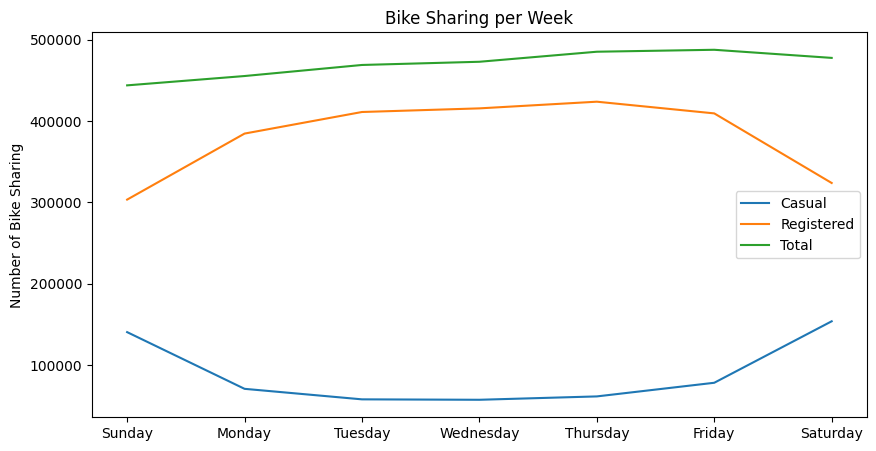

In [171]:
week_bike = day_df.groupby(day_df['weekday']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()

plt.figure(figsize=(10, 5))

plt.plot(week_bike['weekday'], week_bike['casual'], label='Casual')
plt.plot(week_bike['weekday'], week_bike['registered'], label='Registered')
plt.plot(week_bike['weekday'], week_bike['cnt'], label='Total')

weekday_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

plt.title("Bike Sharing per Week")
plt.xticks(week_bike['weekday'], labels=weekday_names)
plt.ylabel('Number of Bike Sharing')
plt.legend()
plt.show()


Dapat terlihat bahwa pada pengguna di hari kerja (monday hingga friday) mengalami peningkatan pada pengguna registered dan berbanding berbalik pada pengguna casual. Sedangkan, pada hari libur (saturday hingga sunday) mengalami peningkatan pada pengguna casual dan berbading berbalik pad pengguna registered. Hal tersebut terlihat bahwa kemungkinan pengguna casual merupakan pengguna dari pendatang yang hanya menggunakan pada hari libur. Sedangkan, pada pengguna registered merupakan pengguna dari masyarakat lokal yang menggunakannya untuk kegiatan sehari-hari dan tidak menggunakannya pada hari libur karena dimungkinkan sedang tidak keluar rumah atau berlibur keluar daerah.

## Conclusion
- Pada kondisi cuaca dibulan desember hingga februari cenderung berada pada kondisi yang temperatur dan humidity rendah, serta wind speed tinggi sehingga mengalami penurunan dari para pengguna baik casual ataupun registered. Dikarenakan, kondisi cuaca yang menyebabkan pengguna menurun.
- Pada hari kerja, pengguna registered cenderung menggunakan bike sharing dibandingkan dengan pengguna casual. Sedangkan, pada hari libur pengguna casual mengalami peningkatan dibandingkan pengguna registered. Hal itu dikarenakan pengguna registered umumnya dari masyarakat lokal dan pengguna casual umumnya dari masyarakat pendatang.